Количество бревен: 100
Количество бревен: 165
Количество бревен: 229
Количество бревен: 142
Количество бревен: 62
Количество бревен: 165
Количество бревен: 62


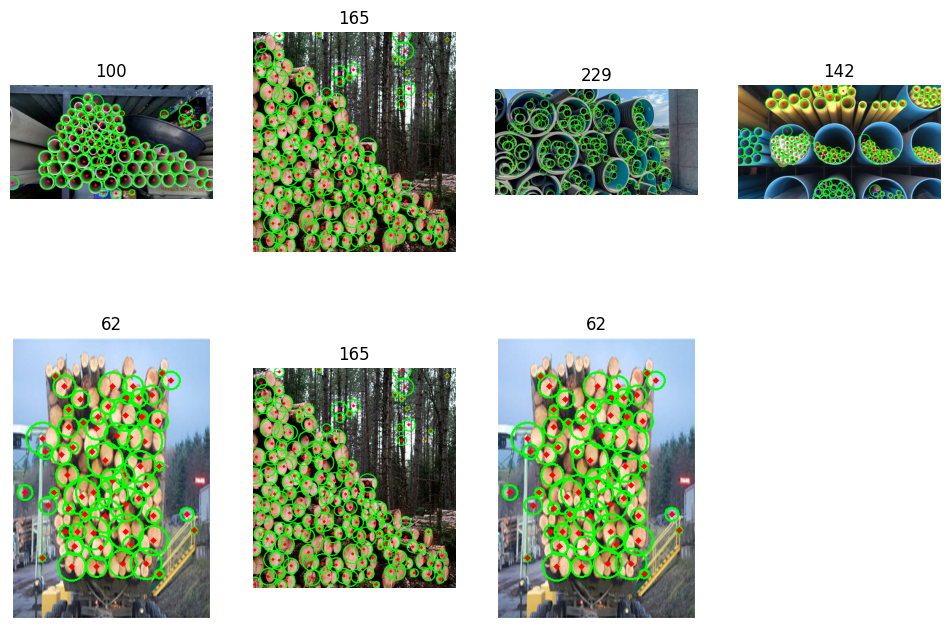

In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import os


def find_circles(image_path):
    # Преобразование изображения в оттенки серого
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur = cv2.medianBlur(gray_image, 7)

    # Поиск кругов на изображении
    circles = cv2.HoughCircles(
        blur, 
        cv2.HOUGH_GRADIENT, dp=1, minDist=15, param1=300, param2=11, minRadius=0, maxRadius=25
    )

    # Удаление пересекающихся кругов (точнее оставляем только один из них)
    filtered_circles = []
    threshold = 0.7
    for i in range(len(circles[0])):
        x1, y1, r1 = circles[0][i]
        circle1 = Point(x1, y1).buffer(r1)
        meets_criteria = True
        for j in range(len(filtered_circles)):
            if i != j:
                x2, y2, r2 = filtered_circles[j]
                circle2 = Point(x2, y2).buffer(r2)
                intersection_area = circle1.intersection(circle2).area
                min_area = min(circle1.area, circle2.area)
                if intersection_area / min_area > threshold:
                    meets_criteria = False
                    break
        if meets_criteria:
            filtered_circles.append(circles[0][i])

    circles = [filtered_circles]
    # Проверка, были ли найдены круги
    if filtered_circles is not None:
        # Преобразование координат и радиусов кругов в целые числа
        circles = np.uint16(np.around(circles))
        # Рисование найденных кругов на изображении
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # Координаты центра круга
            radius = circle[2]  # Радиус круга
            # Рисование круга и его центра на изображении
            cv2.circle(image, center, radius, (0, 255, 0), 2)
            cv2.circle(image, center, 2, (0, 0, 255), 3)

        # Подсчет количества кругов (бревен)
        number_of_objects = circles.shape[1]
        print(f'Количество кругов: {number_of_objects}')
        return [image, number_of_objects]
    else:
        print('Круги не найдены на изображении.')
        return [image, 0]


images_path = 'images'
images = os.listdir(images_path)
result = []
for img in images:
    result.append(find_circles(os.path.join(images_path, img)))

# Отображение результатов
plt.figure(figsize=(12, 8))
img_count = len(images)
ay = int(img_count / 2) if img_count % 2 == 0 else int((img_count+1) / 2)
for i in range(img_count):
    plt.subplot(2, ay, i+1)
    plt.imshow(cv2.cvtColor(result[i][0], cv2.COLOR_BGR2RGB))  # Отображаем первое изображение
    plt.title(f'{result[i][1]}')  # Заголовок для первого изображения
    plt.axis('off')

plt.show()  # Показываем изображения